# Get Started

In [2]:
import pandas as pd # data frames, make easy access and analyze data. We will use this to hold  and manipulate our data 
import os
import statistics
import numpy as np # support scientific computing through dimentional arrays, algebra and numeric capabilities  
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt # to plot data. 2D plot library for publicatio quality grsphics on our data
import sys
# !conda install --yes --prefix {sys.prefix} plotly
from scipy import stats
from scipy.stats import poisson
%matplotlib inline
import scipy 
sns.set_theme (style='darkgrid')
from scipy.stats import kurtosis
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Loading the data

In [5]:
#uploading dataset 
df = pd.read_csv("live animal stock.csv")
df.shape

(4456, 14)

# Undestanding the data

In [6]:
df.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2010,2010,Head,41,A,Official figure
1,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2011,2011,Head,55,A,Official figure
2,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2012,2012,Head,34,A,Official figure
3,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2013,2013,Head,56,A,Official figure
4,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2014,2014,Head,27,A,Official figure
5,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2015,2015,Head,30,A,Official figure
6,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2016,2016,Head,16,A,Official figure
7,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2017,2017,Head,24,A,Official figure
8,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2018,2018,Head,19,A,Official figure
9,TCL,Crops and livestock products,250,France,5608,Import Quantity,2132.0,Asses,2019,2019,Head,26,I,Imputed value


In [7]:
df.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
4451,TCL,Crops and livestock products,840,United States of America,5922,Export Value,2152.0,Turkeys,2017,2017,1000 US$,13025,A,Official figure
4452,TCL,Crops and livestock products,840,United States of America,5922,Export Value,2152.0,Turkeys,2018,2018,1000 US$,13318,A,Official figure
4453,TCL,Crops and livestock products,840,United States of America,5922,Export Value,2152.0,Turkeys,2019,2019,1000 US$,12868,A,Official figure
4454,TCL,Crops and livestock products,840,United States of America,5922,Export Value,2152.0,Turkeys,2020,2020,1000 US$,9888,A,Official figure
4455,TCL,Crops and livestock products,840,United States of America,5922,Export Value,2152.0,Turkeys,2021,2021,1000 US$,13024,A,Official figure


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4456 non-null   object 
 1   Domain            4456 non-null   object 
 2   Area Code (M49)   4456 non-null   int64  
 3   Area              4456 non-null   object 
 4   Element Code      4456 non-null   int64  
 5   Element           4456 non-null   object 
 6   Item Code (CPC)   4456 non-null   float64
 7   Item              4456 non-null   object 
 8   Year Code         4456 non-null   int64  
 9   Year              4456 non-null   int64  
 10  Unit              4456 non-null   object 
 11  Value             4456 non-null   int64  
 12  Flag              4456 non-null   object 
 13  Flag Description  4456 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 487.5+ KB


In [9]:
df.nunique() 

Domain Code            1
Domain                 1
Area Code (M49)        8
Area                   8
Element Code           6
Element                4
Item Code (CPC)       17
Item                  17
Year Code             12
Year                  12
Unit                   3
Value               2679
Flag                   4
Flag Description       4
dtype: int64

# Preprocessing the Dataset

## Step 1 - Seperating the Element(Import Value)

In [10]:
imp = df[df['Element'].str.count('Import Value') == 1]
print(len(imp['Value']))
imp['id'] = [f'ID_{i+1}' for i in range(len(imp))]
imp.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Import Value', 'Flag', 'Flag Description','id']
imp = imp.drop(['Domain Code', 'Domain', 'Item Code (CPC)','Area Code (M49)','Area','Element Code', 'Element','Year Code',  'Flag', 'Flag Description'],axis=1)
imp

1253


,Item,Year,Unit,Import Value,id
12,Asses,2010,1000 US$,38,ID_1
13,Asses,2011,1000 US$,79,ID_2
14,Asses,2012,1000 US$,47,ID_3
15,Asses,2013,1000 US$,69,ID_4
16,Asses,2014,1000 US$,40,ID_5
...,...,...,...,...,...
4427,Turkeys,2017,1000 US$,32128,ID_1249
4428,Turkeys,2018,1000 US$,32602,ID_1250
4429,Turkeys,2019,1000 US$,27920,ID_1251
4430,Turkeys,2020,1000 US$,27132,ID_1252


# Step 2 - Seperating the Element(Export Value)

In [11]:
exp = df[df['Element'].str.count('Export Value') == 1]
exp['id'] = [f'ID_{i+1}' for i in range(len(exp))]
exp.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Export Value', 'Flag', 'Flag Description','id']
exp = exp.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
exp

,Export Value,id
36,12,ID_1
37,18,ID_2
38,5,ID_3
39,4,ID_4
40,11,ID_5
...,...,...
4451,13025,ID_1124
4452,13318,ID_1125
4453,12868,ID_1126
4454,9888,ID_1127


# Step 3 - Seperating the Element(Export Value)

In [12]:
exp_q = df[df['Element'].str.count('Export Quantity') == 1]
exp_q['id'] = [f'ID_{i+1}' for i in range(len(exp_q))]
exp_q.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Export Quantity', 'Flag', 'Flag Description','id']
exp_q = exp_q.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
exp_q

,Export Quantity,id
24,5,ID_1
25,16,ID_2
26,4,ID_3
27,8,ID_4
28,36,ID_5
...,...,...
4439,10458,ID_975
4440,9756,ID_976
4441,6043,ID_977
4442,4857,ID_978


# Step 4 - Seperating the Element(Export Value)

In [13]:
imp_q = df[df['Element'].str.count('Import Quantity') == 1]
imp_q['id'] = [f'ID_{i+1}' for i in range(len(imp_q))]
imp_q.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Import Quantity', 'Flag', 'Flag Description','id']
imp_q = imp_q.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
imp_q

,Area,Import Quantity,id
0,France,41,ID_1
1,France,55,ID_2
2,France,34,ID_3
3,France,56,ID_4
4,France,27,ID_5
...,...,...,...
4415,United States of America,7574,ID_1092
4416,United States of America,17397,ID_1093
4417,United States of America,9735,ID_1094
4418,United States of America,17096,ID_1095


# Step 5 - Seperating the Element(Export Value)

In [14]:
#merging data on unique id using inner join
data = pd.merge(imp,exp,on='id',how='inner')
data = pd.merge(data,imp_q,on='id',how='inner')
data = pd.merge(data,exp_q,on='id',how='inner')
data.shape

(979, 9)

In [15]:
data.head()

,Item,Year,Unit,Import Value,id,Export Value,Area,Import Quantity,Export Quantity
0,Asses,2010,1000 US$,38,ID_1,12,France,41,5
1,Asses,2011,1000 US$,79,ID_2,18,France,55,16
2,Asses,2012,1000 US$,47,ID_3,5,France,34,4
3,Asses,2013,1000 US$,69,ID_4,4,France,56,8
4,Asses,2014,1000 US$,40,ID_5,11,France,27,36


# Step 6 - Seperating the Element(Export Value)

In [16]:
#adding new column of net export to the data
data['Net Export Value'] = data['Export Value'] - data['Import Value']
data.head(10)

,Item,Year,Unit,Import Value,id,Export Value,Area,Import Quantity,Export Quantity,Net Export Value
0,Asses,2010,1000 US$,38,ID_1,12,France,41,5,-26
1,Asses,2011,1000 US$,79,ID_2,18,France,55,16,-61
2,Asses,2012,1000 US$,47,ID_3,5,France,34,4,-42
3,Asses,2013,1000 US$,69,ID_4,4,France,56,8,-65
4,Asses,2014,1000 US$,40,ID_5,11,France,27,36,-29
5,Asses,2015,1000 US$,290,ID_6,18,France,30,49,-272
6,Asses,2016,1000 US$,14,ID_7,7,France,16,16,-7
7,Asses,2017,1000 US$,38,ID_8,17,France,24,28,-21
8,Asses,2018,1000 US$,16,ID_9,7,France,19,9,-9
9,Asses,2019,1000 US$,20,ID_10,50,France,26,25,30


In [17]:
data.shape

(979, 10)

## Dashboard Section

In [18]:
# Values    
fig1 = px.bar(x=data['Area'], y=data['Export Value'], title="Export Value analysis for each country")
fig1.show();   


In [20]:
fig4 = px.bar(y=data['Export Value'], x=data['Year'], color=data['Area'], title='Yearly Export Value of all Countries specified')
fig4.show();

In [21]:
fig2 = px.bar(x=data['Area'], y=data['Import Value'], title="Import Value analysis for each country")
fig2.show();

In [22]:
fig3 = px.bar(y=data['Import Value'], x=data['Year'], color=data['Area'], title='Yearly Import Value of all Countries specified')
fig3.show();

In [24]:
fig1 = px.bar(x=data['Area'], y=data['Export Quantity'], title="Export Quantity analysis for each country")
fig1.show();

In [26]:
fig4 = px.bar(y=data['Export Quantity'], x=data['Year'], color=data['Area'], title='Yearly Export Quantity of all Countries specified')
fig4.show();

In [27]:
fig2 = px.bar(x=data['Area'], y=data['Import Quantity'], title="Import Quantity analysis for each country")
fig2.show();

In [28]:
table_data = pd.DataFrame()
table_data['Items'] = data.groupby('Area')['Net Export Value'].mean().index
table_data['Total Frequency'] = data.groupby('Area')['Net Export Value'].mean().values
    

fig = ff.create_table(table_data, height_constant=60)

Items = data.groupby('Area')['Net Export Value'].mean().index
Total_Frequency = data.groupby('Area')['Net Export Value'].mean().values

trace1 = go.Bar(x=Items, y=Total_Frequency,
                    marker=dict(color='#0099ff'),
                    name='Total frequency of all crops',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Net Export Value'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})


# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})


fig.show();    



In [29]:
table_data = pd.DataFrame()
table_data['Items'] = data['Item'].value_counts().index
table_data['Total Frequency'] = data['Item'].value_counts().values
    

fig = ff.create_table(table_data, height_constant=60)

Items = data['Item'].value_counts().index
Total_Frequency = data['Item'].value_counts().values

trace1 = go.Bar(x=Items, y=Total_Frequency,
                    marker=dict(color='#0099ff'),
                    name='Total frequency of all crops',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Total frequency of all crops'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})


# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

fig.show();

# Exploratory Data Analysis

In [19]:
#exploring the dataset insight and paterns
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,23047.0,2014.937172,3.171957e+00,2010.0,2012.00,2015.0,2018.00,2020.0
Import Value,22934.0,157047.595753,4.449618e+05,0.0,3565.25,23956.0,109065.00,9472615.0
Export Value,22918.0,186241.810629,7.745842e+05,0.0,1345.25,13950.5,90641.25,25851456.0
Import Quantity,22912.0,128183.333231,5.401979e+05,0.0,1519.00,13499.0,66349.25,15542605.0
Export Quantity,22892.0,176697.847720,1.654605e+06,0.0,445.00,6801.0,54823.00,70066295.0
Net Export Value,22807.0,29287.536853,8.663126e+05,-9472615.0,-60996.50,-1570.0,42409.00,25784679.0


In [20]:
# list of agriculture tha we have in the data
crop_names = data['Item'].unique()
print(crop_names)

# how many types of crops are there in the dataset
print(data['Item'].unique().shape)

['Abaca, manila hemp, raw' 'Almonds, in shell' 'Almonds, shelled'
 'Animal oils and fats n.e.c.'
 'Animal or vegetable fats and oils and their fractions, chemically modified, except those hydrogenated, inter-esterified, re-esterified or elaidinized; inedible mixtures or preparations of animal or vegetable fats or oils'
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw'
 'Apple juice' 'Apple juice, concentrated' 'Apples' 'Apricots'
 'Apricots, dried' 'Areca nuts' 'Artichokes' 'Asparagus' 'Asses'
 'Avocados' 'Bambara beans, dry' 'Bananas' 'Barley' 'Barley, pearled'
 'Beans, dry' 'beef and veal preparations nes' 'Beer of barley, malted'
 'Bees' 'Beeswax' 'Beet pulp' 'Blueberries' 'Bran of maize'
 'Bran of wheat' 'Brazil nuts, shelled' 'Bread' 'Breakfast cereals'
 'Brewing or distilling dregs and waste'
 'Broad beans and horse beans, dry' 'Buckwheat' 'Butter of cow milk'
 'Buttermilk, curdled and acidified milk' 'Cabbages' 'Cake of  linseed'
 'Cake of  soya beans'

In [21]:
data['Area'].value_counts()

Germany                     4026
France                      3995
Italy                       3986
Spain                       3984
Ireland                     3871
United States of America    3185
Name: Area, dtype: int64

<AxesSubplot:xlabel='Net Export Value', ylabel='Area'>

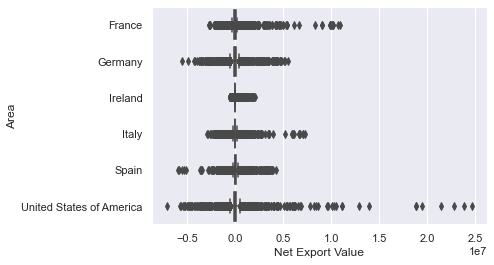

In [90]:
sb.boxplot(x='Net Export Value', y='Area', data=data)

AttributeError: module 'seaborn' has no attribute 'plt'

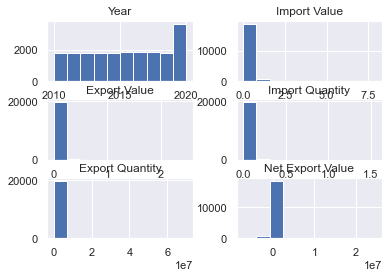

In [92]:
data.hist()
sns.plt.show()

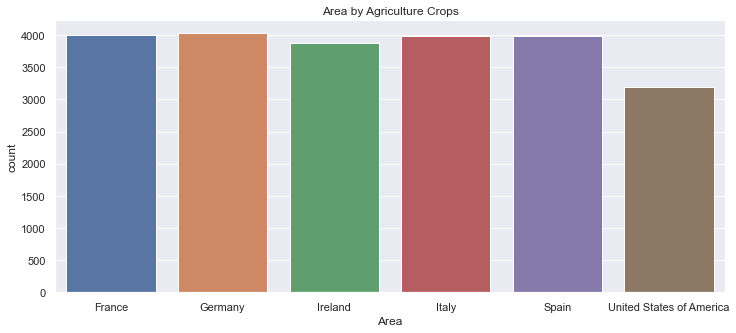

In [22]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Area by Agriculture Crops")                                    
plt.xlabel("Countries")
plt.ylabel("Frequency")
sns.countplot(x=data['Area']);

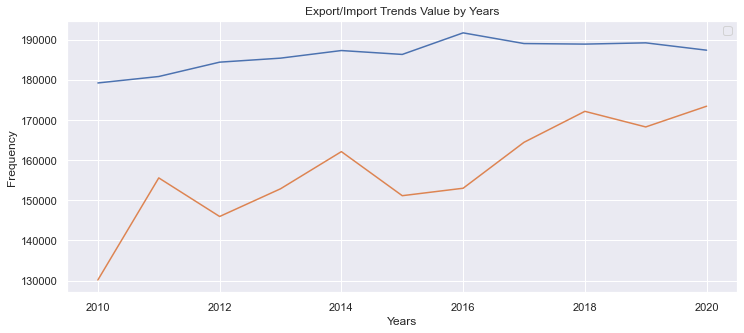

In [23]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Export/Import Trends Value by Years")                                    
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.legend(['Export Value','Import Value'])
grp1 = data.groupby('Year')['Export Value'].mean()
grp2 = data.groupby('Year')['Import Value'].mean()
sns.lineplot(x=grp1.index, y=grp1.values);
sns.lineplot(x=grp2.index, y=grp2.values);

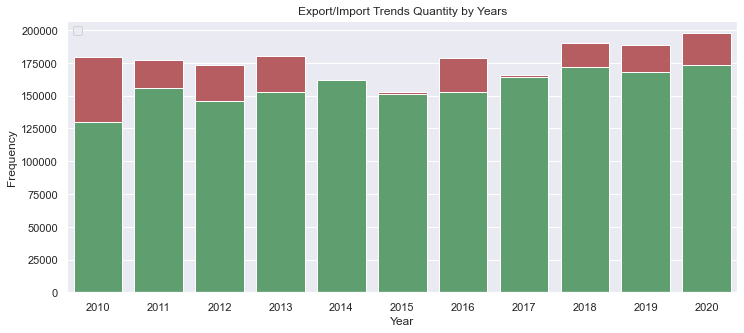

In [24]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Export/Import Trends Quantity by Years")                                    
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.legend(['Export Quantity','Import Quantity'])
grp1 = data.groupby('Year')['Export Quantity'].mean()
grp2 = data.groupby('Year')['Import Value'].mean()
sns.barplot(x=grp1.index, y=grp1.values, color='r');
sns.barplot(x=grp2.index, y=grp2.values, color='g');

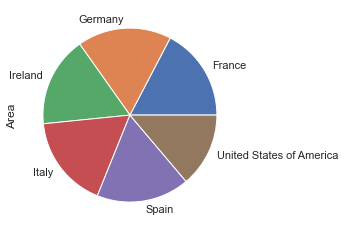

In [25]:
data.groupby('Area').Area.count().plot(kind='pie')
plt.show()

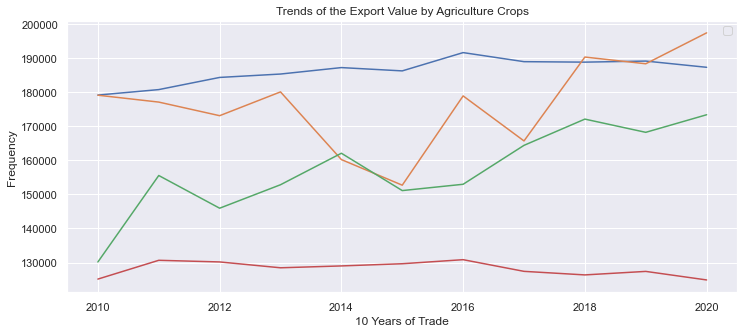

In [26]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Trends of the Export Value by Agriculture Crops")                                    
plt.xlabel("10 Years of Trade")
plt.ylabel("Frequency")
plt.legend([''])
grp1 = data.groupby('Year')['Export Value'].mean()
grp3 = data.groupby('Year')['Import Value'].mean()
grp2 = data.groupby('Year')['Export Quantity'].mean()
grp4 = data.groupby('Year')['Import Quantity'].mean()
sns.lineplot(x=grp1.index, y=grp1.values);
sns.lineplot(x=grp2.index, y=grp2.values);
sns.lineplot(x=grp3.index, y=grp3.values);
sns.lineplot(x=grp3.index, y=grp4.values);

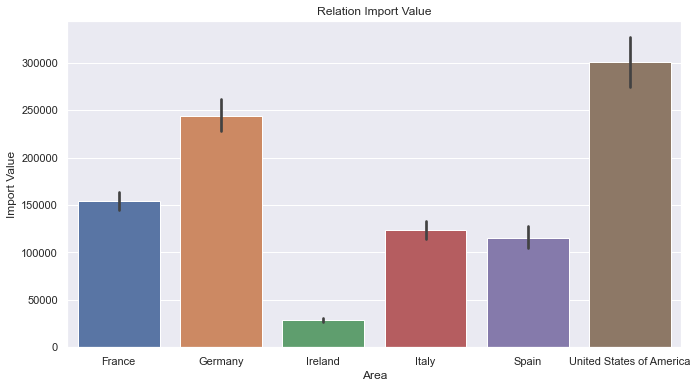

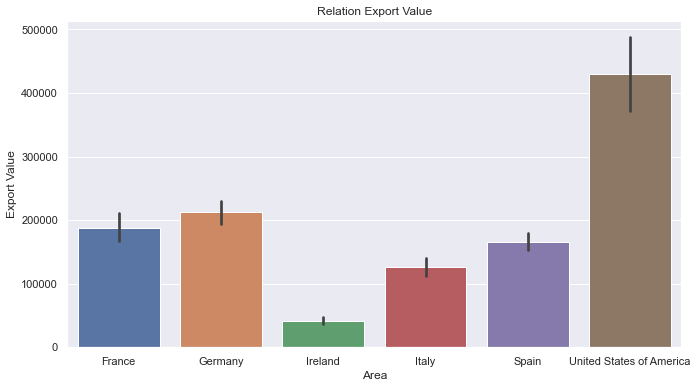

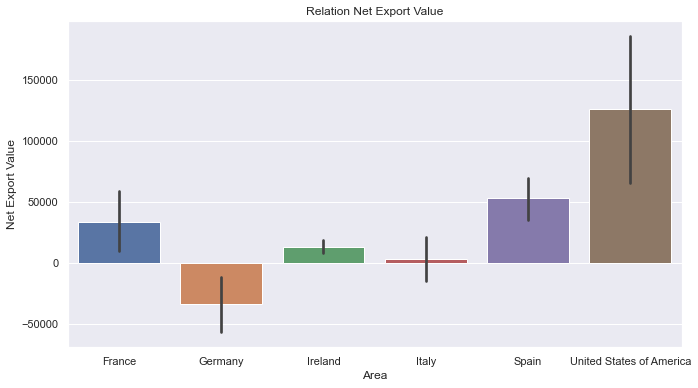

In [27]:
#visualising import, export and net export value
cols = ['Import Value','Export Value','Net Export Value']
def generate_barplot(cols):
    for col in cols:
        plt.figure(figsize=(11,6))
        plt.title(f'Relation {col}')
        sns.barplot(x=data['Area'], y=data[col])
        plt.show()
        
generate_barplot(cols)

# Data Cleaning

In [38]:
#some of the value column are 0, we need to remove them as the are not useful for this analysis. (It means zero transation occured for such agriculture crops in "item column") 
d.loc[(data[['Import Value', 'Export Value', 'Import Quantity', 'Export Quantity', 'Net Export Value' ]] != 0).all(axis=1)]

,Item,Year,Import Value,Export Value,Area,Import Quantity,Export Quantity,Net Export Value
4,"Almonds, in shell",2010.0,1424.0,90.0,France,633.0,16.0,-1334.0
5,"Almonds, in shell",2011.0,2225.0,73.0,France,685.0,14.0,-2152.0
6,"Almonds, in shell",2012.0,2920.0,168.0,France,889.0,32.0,-2752.0
7,"Almonds, in shell",2013.0,3473.0,168.0,France,822.0,27.0,-3305.0
8,"Almonds, in shell",2014.0,9146.0,1611.0,France,1395.0,192.0,-7535.0
...,...,...,...,...,...,...,...,...
22794,"Sausages and similar products of meat, offal o...",2011.0,31166.0,8141.0,United States of America,13769.0,71.0,-23025.0
22795,"Sausages and similar products of meat, offal o...",2012.0,25084.0,5175.0,United States of America,25134.0,74.0,-19909.0
22797,"Sausages and similar products of meat, offal o...",2014.0,28404.0,4578.0,United States of America,22080.0,36.0,-23826.0
23000,Sugar beet,2015.0,3161.0,5307.0,United States of America,1624880.0,91570.0,2146.0


In [39]:
data = data.loc[(data[['Import Value', 'Export Value', 'Import Quantity', 'Export Quantity', 'Net Export Value' ]] != 0).all(axis=1)]
d

,Item,Year,Import Value,Export Value,Area,Import Quantity,Export Quantity,Net Export Value
4,"Almonds, in shell",2010.0,1424.0,90.0,France,633.0,16.0,-1334.0
5,"Almonds, in shell",2011.0,2225.0,73.0,France,685.0,14.0,-2152.0
6,"Almonds, in shell",2012.0,2920.0,168.0,France,889.0,32.0,-2752.0
7,"Almonds, in shell",2013.0,3473.0,168.0,France,822.0,27.0,-3305.0
8,"Almonds, in shell",2014.0,9146.0,1611.0,France,1395.0,192.0,-7535.0
...,...,...,...,...,...,...,...,...
22794,"Sausages and similar products of meat, offal o...",2011.0,31166.0,8141.0,United States of America,13769.0,71.0,-23025.0
22795,"Sausages and similar products of meat, offal o...",2012.0,25084.0,5175.0,United States of America,25134.0,74.0,-19909.0
22797,"Sausages and similar products of meat, offal o...",2014.0,28404.0,4578.0,United States of America,22080.0,36.0,-23826.0
23000,Sugar beet,2015.0,3161.0,5307.0,United States of America,1624880.0,91570.0,2146.0


# Getting the 25th and 75th percentile to remove outliers

In [40]:
etr = data['Export Value'].describe().to_list()
itr = data['Import Value'].describe().to_list()


eq1, eq2 = etr[4], etr[6]
iq1, iq2 = itr[4], itr[6]
iq1, iq2, eq1, eq2

(4769.0, 118614.25, 2114.75, 99056.5)

In [41]:
# filtered dataframe
dr = data.where(data['Export Value'] > eq1)
dr = data.where(data['Import Value'] > iq1)
dr = data.where(data['Export Value'] < eq2)
dr = data.where(data['Export Quantity'] > 0)
dr = dr.where(dr['Import Value'] < iq2)
dr.dropna(axis=0, inplace=True)

# New dataframe
d = dr[dr['Export Value'] < 50000]
d['Export Value'] = [int(i) for i in d['Export Value']]
d['Export Quantity'] = [int(i) for i in d['Export Quantity']]
d['Import Value'] = [int(i) for i in d['Import Value']]
d['Import Quantity'] = [int(i) for i in d['Import Quantity']]
d['Net Export Value'] = [int(i) for i in d['Net Export Value']]

# FIlter the outliers
nqr = d['Net Export Value'].describe().to_list()
nq1, nq2 = nqr[4], nqr[6]
d = d.where(d['Net Export Value'] > nq1)
d = d.where(d['Net Export Value'] < nq2)
d.dropna(axis=0, inplace=True)

<ipython-input-41-3f8c9d0e1368>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Export Value'] = [int(i) for i in d['Export Value']]
<ipython-input-41-3f8c9d0e1368>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Export Quantity'] = [int(i) for i in d['Export Quantity']]
<ipython-input-41-3f8c9d0e1368>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7a0151c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7a015dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f7a015ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7a083b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f7a083d60>],
 'means': []}

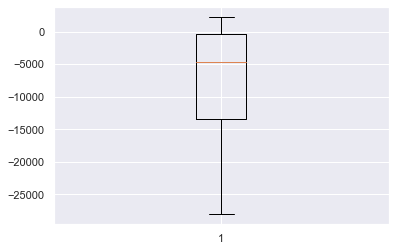

In [42]:
plt.boxplot(d['Net Export Value'])

In [43]:
#DROPPING SOME UNNEEDED COLUMNS
d = d.drop(['Unit', 'id'], axis=1)
# display the dataframe
d

,Item,Year,Import Value,Export Value,Area,Import Quantity,Export Quantity,Net Export Value
4,"Almonds, in shell",2010.0,1424.0,90.0,France,633.0,16.0,-1334.0
5,"Almonds, in shell",2011.0,2225.0,73.0,France,685.0,14.0,-2152.0
6,"Almonds, in shell",2012.0,2920.0,168.0,France,889.0,32.0,-2752.0
7,"Almonds, in shell",2013.0,3473.0,168.0,France,822.0,27.0,-3305.0
8,"Almonds, in shell",2014.0,9146.0,1611.0,France,1395.0,192.0,-7535.0
...,...,...,...,...,...,...,...,...
22795,"Sausages and similar products of meat, offal o...",2012.0,25084.0,5175.0,United States of America,25134.0,74.0,-19909.0
22796,"Sausages and similar products of meat, offal o...",2013.0,28328.0,3401.0,United States of America,27184.0,50.0,-24927.0
22797,"Sausages and similar products of meat, offal o...",2014.0,28404.0,4578.0,United States of America,22080.0,36.0,-23826.0
23000,Sugar beet,2015.0,3161.0,5307.0,United States of America,1624880.0,91570.0,2146.0


# Descriptive Statistics

In [44]:
#getting all variables mean at once
d.mean()

Year                  2014.976892
Import Value         12388.505930
Export Value          4812.193865
Import Quantity     119133.089366
Export Quantity     101616.155624
Net Export Value     -7576.312065
dtype: float64

In [45]:
#getting all variables median at once
d.median()

Year                 2015.0
Import Value         8433.0
Export Value         1185.5
Import Quantity     11898.5
Export Quantity      4527.0
Net Export Value    -4650.5
dtype: float64

In [46]:
#getting all variables mode at once
d.mode()

,Item,Year,Import Value,Export Value,Area,Import Quantity,Export Quantity,Net Export Value
0,"Citrus juice, concentrated n.e.c.",2015.0,1.0,1.0,Ireland,1.0,1.0,4.0


In [47]:
#variance of all column at a go
d.var()

Year                9.790630e+00
Import Value        1.643984e+08
Export Value        7.109579e+07
Import Quantity     2.286078e+11
Export Quantity     1.818533e+11
Net Export Value    7.064454e+07
dtype: float64

In [48]:
#standard Deviation of all column at a go
d.std()

Year                     3.128998
Import Value         12821.795509
Export Value          8431.831898
Import Quantity     478129.507851
Export Quantity     426442.558803
Net Export Value      8405.030688
dtype: float64

In [49]:
#skewedness of all variables
print(d.skew())

Year                 0.013155
Import Value         1.356122
Export Value         2.710497
Import Quantity     10.189342
Export Quantity     10.388441
Net Export Value    -0.835085
dtype: float64


In [50]:
d.kurtosis()

Year                 -1.188424
Import Value          1.873534
Export Value          7.704129
Import Quantity     135.336608
Export Quantity     135.868901
Net Export Value     -0.532794
dtype: float64

# Inferential statistics

In [53]:
#removing empty spaces in columns
d.columns = d.columns.str.replace(" ", "")
# display the dataframe
d

,Item,Year,ImportValue,ExportValue,Area,ImportQuantity,ExportQuantity,NetExportValue
4,"Almonds, in shell",2010.0,1424.0,90.0,France,633.0,16.0,-1334.0
5,"Almonds, in shell",2011.0,2225.0,73.0,France,685.0,14.0,-2152.0
6,"Almonds, in shell",2012.0,2920.0,168.0,France,889.0,32.0,-2752.0
7,"Almonds, in shell",2013.0,3473.0,168.0,France,822.0,27.0,-3305.0
8,"Almonds, in shell",2014.0,9146.0,1611.0,France,1395.0,192.0,-7535.0
...,...,...,...,...,...,...,...,...
22795,"Sausages and similar products of meat, offal o...",2012.0,25084.0,5175.0,United States of America,25134.0,74.0,-19909.0
22796,"Sausages and similar products of meat, offal o...",2013.0,28328.0,3401.0,United States of America,27184.0,50.0,-24927.0
22797,"Sausages and similar products of meat, offal o...",2014.0,28404.0,4578.0,United States of America,22080.0,36.0,-23826.0
23000,Sugar beet,2015.0,3161.0,5307.0,United States of America,1624880.0,91570.0,2146.0


# 1 Normality

<Figure size 432x288 with 0 Axes>

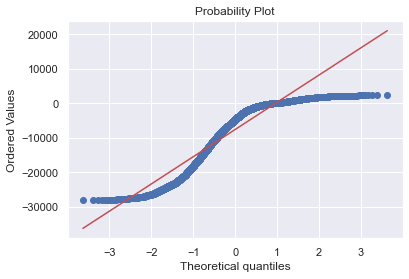

<Figure size 432x288 with 0 Axes>

In [54]:
#Checking normality with a plot
stats.probplot(d.NetExportValue, plot = plt)
plt.figure()

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


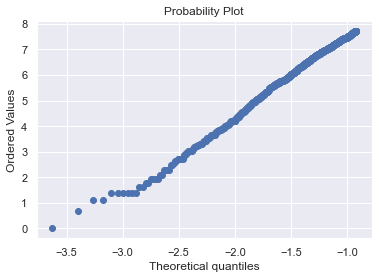

In [55]:
# use scipy.stats to plot against a norm
stats.probplot(np.log(d['NetExportValue']), dist="norm", plot=plt);

# 2 Normality using Shapiro Wilk test
## Data come from a normal distribution
## Data does not come from a normal distribution
### p> 0.05 accept H0
### p< 0.05 reject H1

In [57]:
stats.shapiro(d.NetExportValue[data.Area == "Ireland"])

ShapiroResult(statistic=0.8184926509857178, pvalue=4.5303861642550333e-38)

In [58]:
stats.shapiro(d.NetExportValue[d.Area == "France"])

ShapiroResult(statistic=0.9175293445587158, pvalue=4.0882684454745945e-20)

In [59]:
stats.shapiro(d.NetExportValue[d.Area == "Germany"])

ShapiroResult(statistic=0.8969371318817139, pvalue=2.90886204963427e-19)

In [60]:
stats.shapiro(d.NetExportValue[d.Area == "Spain"])

ShapiroResult(statistic=0.8726942539215088, pvalue=4.533396267840165e-25)

In [61]:
stats.shapiro(d.NetExportValue[d.Area == "Italy"])

ShapiroResult(statistic=0.9058552384376526, pvalue=2.6183558777177356e-23)

In [62]:
stats.shapiro(d.NetExportValue[d.Area == "United States of America"])

ShapiroResult(statistic=0.8796030282974243, pvalue=2.633979392561124e-15)

In [63]:
d['Area'].value_counts()

Ireland                     1493
Italy                        915
Spain                        804
France                       774
Germany                      578
United States of America     326
Name: Area, dtype: int64

# Test for Homogeneity 

In [67]:
#Checking variances with Levene
Ireland = d.NetExportValue[d.Area == 'Ireland']
Germany = d.NetExportValue[d.Area == 'Germany']
Spain = d.NetExportValue[d.Area == 'Spain']
France = d.NetExportValue[d.Area == 'France']
Italy = d.NetExportValue[d.Area == 'Italy']
USA = d.NetExportValue[d.Area == 'United States of America']

In [68]:
from scipy.stats import levene

In [70]:
levene(Ireland, Germany, Spain, France, Italy, USA, center = 'mean')

LeveneResult(statistic=22.354923497006688, pvalue=3.137232444512304e-22)

# Determine if there is any significant difference in the average NetExportValue among the countries countries

In [71]:
d.groupby('Area').describe().T

Area                        France       Germany       Ireland         Italy  \
Year           count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean   2.014784e+03  2.014993e+03  2.015012e+03  2.015145e+03   
               std    3.122130e+00  3.089080e+00  3.121939e+00  3.138953e+00   
               min    2.010000e+03  2.010000e+03  2.010000e+03  2.010000e+03   
               25%    2.012000e+03  2.012000e+03  2.012000e+03  2.012000e+03   
               50%    2.015000e+03  2.015000e+03  2.015000e+03  2.015000e+03   
               75%    2.017000e+03  2.018000e+03  2.018000e+03  2.018000e+03   
               max    2.020000e+03  2.020000e+03  2.020000e+03  2.020000e+03   
ImportValue    count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean   1.563030e+04  1.539511e+04  7.639776e+03  1.409259e+04   
               std    1.415861e+04  1.380192e+04  1.031301e+04  1.237284e+04   
               min    1.000000e+00  2.000000e+00  1.000000e+00  1.000000e+00   
               25%    4.371750e+03  2.511000e+03  4.430000e+02  4.175000e+03   
               50%    1.237900e+04  1.343650e+04  2.995000e+03  1.130000e+04   
               75%    2.327800e+04  2.492525e+04  1.110400e+04  2.126500e+04   
               max    7.338800e+04  7.051300e+04  6.418000e+04  6.769200e+04   
ExportValue    count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean   6.896981e+03  6.160102e+03  2.086961e+03  5.227737e+03   
               std    9.968758e+03  9.424438e+03  5.515815e+03  8.391992e+03   
               min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
               25%    4.472500e+02  1.450000e+02  3.800000e+01  3.760000e+02   
               50%    2.794500e+03  2.030500e+03  2.530000e+02  1.986000e+03   
               75%    8.234000e+03  7.355250e+03  1.335000e+03  5.957000e+03   
               max    4.814900e+04  4.871100e+04  4.643200e+04  4.984300e+04   
ImportQuantity count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean   1.368980e+05  2.531233e+05  3.561223e+04  1.076748e+05   
               std    5.557533e+05  5.405329e+05  1.162163e+05  3.750614e+05   
               min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
               25%    3.619500e+03  5.637500e+03  3.220000e+02  2.345500e+03   
               50%    2.633250e+04  3.798950e+04  2.800000e+03  1.631600e+04   
               75%    7.931800e+04  1.954870e+05  1.475100e+04  4.495600e+04   
               max    8.272318e+06  4.594632e+06  1.601643e+06  5.755385e+06   
ExportQuantity count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean   1.540134e+05  2.055233e+05  2.463539e+04  7.928059e+04   
               std    7.051398e+05  5.929430e+05  8.147368e+04  4.218363e+05   
               min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
               25%    7.955000e+02  7.177500e+02  4.600000e+01  4.310000e+02   
               50%    5.725500e+03  1.078100e+04  5.460000e+02  4.311000e+03   
               75%    4.016225e+04  1.429428e+05  9.398000e+03  4.552500e+04   
               max    7.534687e+06  5.228857e+06  1.476820e+06  7.300506e+06   
NetExportValue count  7.740000e+02  5.780000e+02  1.493000e+03  9.150000e+02   
               mean  -8.733323e+03 -9.235003e+03 -5.552815e+03 -8.864858e+03   
               std    8.569197e+03  8.990910e+03  7.410982e+03  8.617724e+03   
               min   -2.803200e+04 -2.765000e+04 -2.781700e+04 -2.800000e+04   
               25%   -1.472650e+04 -1.683300e+04 -9.256000e+03 -1.577850e+04   
               50%   -7.226000e+03 -6.961500e+03 -2.129000e+03 -6.386000e+03   
               75%   -9.422500e+02 -9.072500e+02 -1.900000e+01 -1.486000e+03   
               max    2.285000e+03  2.288000e+03  2.278000e+03  2.277000e+03   

Area                         Spain  United States of America  
Year           c

# Visualising Net Export Value by Area Using Boxplot

<AxesSubplot:xlabel='NetExportValue', ylabel='Area'>

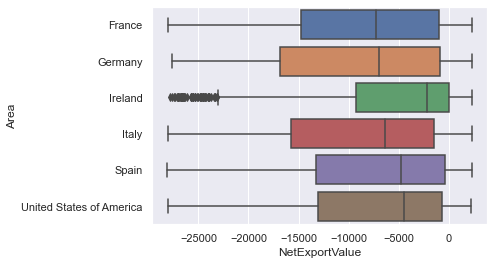

In [72]:
import seaborn as sb
sb.boxplot(x='NetExportValue', y='Area', data=d)

In [ ]:
# Almost symetry but the start area on the lower half of the mediam seems to be greater than the area of on the upper  half of the media
# with this we have the variation of how netexportvalue varies among the countries.

# ONE-WAY ANOVA


### step 1: The null hypothesis states that the mean Net Export Value is equal among all countries.

### H0:μ1=μ2=μ3=μ4=μ5=μ6

### Alternative hypothesis
### H1:Not all the means are equal

### Step 2: Decide on the significance level, α

### α=0.05

In [74]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [79]:
#performing ANOVA
model = ols('NetExportValue~Area', data = d).fit()
aov_model = sm.stats.anova_lm(model, type = 2)
print(aov_model)

              df        sum_sq       mean_sq          F        PR(>F)
Area         5.0  1.027800e+10  2.055600e+09  29.959588  4.345647e-30
Residual  4884.0  3.351032e+11  6.861244e+07        NaN           NaN


# Multiple Comparison Test

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [87]:
mc = mc.MultiComparison(d['NetExportValue'], d['Area'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
France,Germany,-501.6805,0.8726,-1799.8245,796.4635,False
France,Ireland,3180.5079,0.001,2134.5979,4226.4178,True
France,Italy,-131.5349,0.9,-1284.7298,1021.66,False
France,Spain,1084.9213,0.097,-104.1939,2274.0364,False
France,United States of America,1372.1911,0.1218,-186.952,2931.3342,False
Germany,Ireland,3682.1883,0.001,2525.37,4839.0066,True
Germany,Italy,370.1455,0.9,-884.5096,1624.8006,False
Germany,Spain,1586.6017,0.006,298.8534,2874.3501,True
Germany,United States of America,1873.8716,0.014,238.2591,3509.484,True
Ireland,Italy,-3312.0428,0.001,-4303.4606,-2320.625,True


In [ ]:
# rejected = False means it is accepted, meaning there is no significant difference in the 

# TWO-WAY ANOVA
## H0 = means are equal
## H1 = means are not equal

In [80]:
#ANOVA TWO WAYS
model2 = ols('NetExportValue~Area+Item', data = d).fit()
aov2_model = sm.stats.anova_lm(model2, type=2)
print(aov2_model)

              df        sum_sq       mean_sq          F        PR(>F)
Area         5.0  1.027800e+10  2.055600e+09  52.166541  8.671192e-53
Item       318.0  1.551819e+11  4.879933e+08  12.384178  0.000000e+00
Residual  4566.0  1.799213e+11  3.940458e+07        NaN           NaN


In [ ]:
# Assuming Normality Fail

In [ ]:
# NonParametric Test: Kruskal-Wallis Test

In [ ]:
### We Assume no normal distribution
### we do not assume varaince is equal

### The null hypothesis (H0): The median is equal across all groups.

#### The alternative hypothesis: (Ha): The median  Net Export Value Differ for at least one country.

In [ ]:
#Kruskal-Wallis Test
ss.Kruskal(Ireland, Germany, Spain, France, Italy, United States of America)

In [ ]:
# Multiple Comparison Test

In [ ]:
# install required library for Posthoc Test
# pip install scikit-posthocs

In [ ]:
import posthocs as  sp #load the library

In [ ]:
# create a Dataframe
da = [Ireland, Germany, Spain, France, Italy, United States of America]

sp.posthoc_dunn(da, p_adjust = 'bonferroni') #run posthoc test

In [ ]:
#!pip install pingouin
#from pingouin import Kruskal

In [ ]:
#perform Kruskal-Wallis Test 
#stats.kruskal(NetExportValue, Area, Item)

In [ ]:
# Relationship Analysis

In [ ]:
#checking corelation matrix
corelation = d.corr()

In [ ]:
sns.heatmap (corelation, xticklabels = corelation.columns, yticklabels = corelation.columns
             ,annot=True)

In [ ]:
sns.pairplot(d)

In [ ]:
# What is the relationship between the Export Quantity of Agriculture Crops and its Export Value. How does this relationship vary by the Area?

In [ ]:
sns.relplot(x='Year', y='ExportValue', data=d, kind='line', ci=None);

In [ ]:
sns.relplot(x='Year', y='ImportValue', data=d, kind='line', ci=None);

In [ ]:
sns.relplot(x="Year", y="NetExportValue", 
            data=data, kind="line", ci=None, style="Area", hue="Area",
            markers=True, dashes=False);

In [ ]:
sns.relplot(x="Year", y="ExportQuantity", 
            data=d, kind="line", ci=None, style="Area", hue="Area",
            markers=True, dashes=False);

In [ ]:
#plot based on Area
sns.relplot(x ='ExportQuantity', y ='ExportValue', hue = 'Area', data = d)

In [ ]:
# Change to make subplots based on Area
sns.relplot(x="ExportQuantity", y="ExportValue", 
            data=d,
            kind="scatter",
            col="Area")

# Show plot
plt.show()

In [ ]:
sns.distplot(d['Export Value'], bins=20)

In [ ]:
sns.distplot(d['Import Value'])

In [ ]:
sns.distplot(d['NetExportValue']);

In [ ]:
# Labelling

In [ ]:
from sklearn.preprocessing import *
# labelling
cols = ['Item', 'Year', 'Area']
le = LabelEncoder()
for col in cols:
    d[col] = le.fit_transform(d[col])

In [ ]:
d.head()

In [ ]:
# Spliting the data into train and test data

In [ ]:
cols = ['ImportValue', 'ExportValue', 'ImportQuantity', 'ExportQuantity', 'Area','Item','Year']
X = d[cols]
y = d['NetExportValue']

In [ ]:
X.isna().sum()

In [ ]:
# Normalization

In [ ]:
X_sc = StandardScaler().fit_transform(X)
X_sc

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.33, random_state=42)

In [ ]:
# Modelling

In [ ]:
## Model 1 - Linear Regression

In [ ]:
# Model 1 -  Linear Regression
from sklearn.linear_model import *
from sklearn.metrics import *
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_score = lr_model.score(X_train, y_train)
lr_test_score = lr_model.score(X_test, y_test)
print(f'Train Accuracy: {lr_train_score}')
print(f'Test Accuracy: {lr_test_score}')
# prediction
lr_pred = lr_model.predict(X_test)
# Check for Root mean square error
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print(f'MSE:  {lr_mse}')
print(f'RMSE: {lr_rmse}')

In [ ]:
## Model 2 - Random Forest Regressor

In [ ]:
# Model 2 -  Random Forest regressor
from sklearn.ensemble import *
from sklearn.metrics import *
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
rfr_train_score = rfr_model.score(X_train, y_train)
rfr_test_score = rfr_model.score(X_test, y_test)
print(f'Train Accuracy: {rfr_train_score}')
print(f'Test Accuracy: {rfr_test_score}')
# prediction
rfr_pred = rfr_model.predict(X_test)
# Check for Root mean square error
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(f'MSE:  {rfr_mse}')
print(f'RMSE: {rfr_rmse}')

In [ ]:
## Model 3 - Gradient Boosting REgressor

In [ ]:
# Model 3 - Gradient Boosting Regressor 
from sklearn.metrics import *
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_train_score = gbr_model.score(X_train, y_train)
gbr_test_score = gbr_model.score(X_test, y_test)
print(f'Train Accuracy: {gbr_train_score}')
print(f'Test Accuracy: {gbr_test_score}')
# prediction
gbr_pred = gbr_model.predict(X_test)
# Check for Root mean square error
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
print(f'MSE:  {gbr_mse}')
print(f'RMSE: {gbr_rmse}')

In [ ]:
## Model 4 - Gradient Boosting REgressor

In [ ]:
# Model 4 - Lasso Regressor 
from sklearn.metrics import *
ls_model = Lasso()
ls_model.fit(X_train, y_train)
ls_train_score = ls_model.score(X_train, y_train)
ls_test_score = ls_model.score(X_test, y_test)
print(f'Train Accuracy: {ls_train_score}')
print(f'Test Accuracy: {ls_test_score}')
# prediction
ls_pred = ls_model.predict(X_test)
# Check for Root mean square error
ls_mse = mean_squared_error(y_test, ls_pred)
ls_rmse = np.sqrt(ls_mse)
print(f'MSE:  {ls_mse}')
print(f'RMSE: {ls_rmse}')

In [ ]:
## Model 5 - Gradient Boosting REgressor

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
# Model 5 - Xgboost Regressor 
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)
print(f'Train Accuracy: {ls_train_score}')
print(f'Test Accuracy: {ls_test_score}')
# prediction
xgb_pred = xgb_model.predict(X_test)
# Check for Root mean square error
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(f'MSE:  {xgb_mse}')
print(f'RMSE: {xgb_rmse}')

In [ ]:
## Model 6 - Gradient Boosting REgressor

In [ ]:
# Model 6 - Decision Tree REgressor
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
svr_model = DecisionTreeRegressor()
svr_model.fit(X_train, y_train)
svr_train_score = svr_model.score(X_train, y_train)
svr_test_score = svr_model.score(X_test, y_test)
print(f'Train Accuracy: {svr_train_score}')
print(f'Test Accuracy: {svr_test_score}')
# prediction
svr_pred = svr_model.predict(X_test)
# Check for Root mean square error
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
print(f'MSE:  {svr_mse}')
print(f'RMSE: {svr_rmse}')

In [ ]:
# Model Analysis

In [ ]:
models = pd.DataFrame()

In [ ]:
label = ['Linear Regression', 'Random Forest regressor','Gradient Boosting Regressor','Lasso Regressor','Xtreme boost Regressor','Decision Tree REgressor']
train_acc = [lr_train_score, rfr_train_score, gbr_train_score, lr_train_score, xgb_train_score, svr_train_score]
test_acc = [lr_test_score, rfr_test_score, gbr_test_score, lr_test_score, xgb_test_score, svr_test_score]
mse = [lr_mse, rfr_mse, gbr_mse, lr_mse, xgb_mse, svr_mse]
rmse = [lr_rmse, rfr_rmse, gbr_rmse, lr_rmse, xgb_rmse, svr_rmse]

In [ ]:
models['label'] = label
models['Training Accuracy'] = train_acc
models['Test Accuracy'] = test_acc
models['Mean Squrad Error'] = mse
models['Root Mean Squrad Error'] = rmse
models